<a href="https://colab.research.google.com/github/kimp10/Insurance-Fraud-Detection-Model-/blob/main/Insurance_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

### 1. Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/Insurance Fraud Detection project/

/content/drive/My Drive/Colab Notebooks/Insurance Fraud Detection project


##Reading Dataset

In [4]:
Claim_fraud = pd.read_csv('fraud_oracle.csv')

##Analyzing the Data

In [5]:
Claim_fraud.shape

(15420, 33)

The dataset contains 33 columns and 15420 rows.



In [6]:
Claim_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [7]:
Claim_fraud.tail()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [8]:
Claim_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [9]:
Claim_fraud.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

#####Check for *Duplication*

In [10]:
Claim_fraud.nunique()


Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

#####Missing Values Calculation

In [11]:
#Checking for null values
Claim_fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

 There is no missing values

In [55]:
Claim_fraud['Make'].value_counts()

Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Acura         472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nissan         30
BMW            15
Jaguar          6
Porsche         5
Mercedes        4
Ferrari         2
Lexus           1
Name: count, dtype: int64

In [13]:
print(Claim_fraud.Make.unique())
print(Claim_fraud.Make.nunique())

['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
19


Some car models are being misspelled incorrectly


In [14]:
replacements = {'Mecedes': 'Mercedes', 'Accura': 'Acura','Nisson':'Nissan','Porche':'Porsche'}
Claim_fraud['Make'] = Claim_fraud['Make'].replace(replacements)

## Exploratory Data Analysis

### 1. Time and Date Information

In [15]:
## Function to calculate fraud rate for categorical columns
def fraud_rate_by_category(column):
    return Claim_fraud.groupby(column)['FraudFound_P'].mean().sort_values(ascending=False)

# List of categorical columns to analyze
categorical_columns = [
    'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
    'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
    'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
    'Days_Policy_Claim', 'AgeOfVehicle', 'AgeOfPolicyHolder',
    'PoliceReportFiled', 'WitnessPresent', 'AgentType',
    'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy'
]

# Calculate fraud rates for each categorical column
fraud_rates = {col: fraud_rate_by_category(col) for col in categorical_columns}


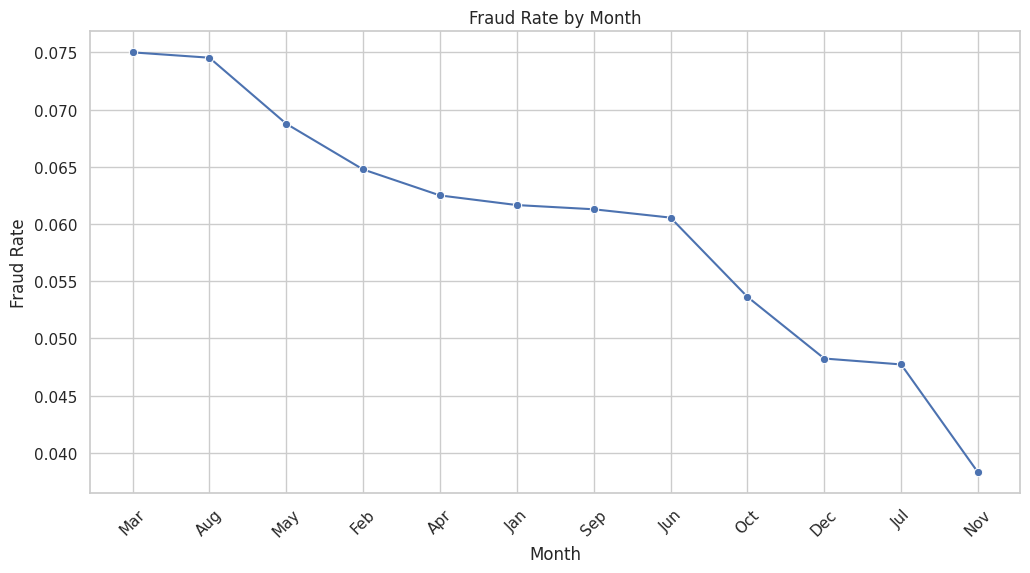

In [16]:

def convert_to_percentage(fraud_rates):
  return fraud_rates*100
# Set the style for the plots
sns.set(style="whitegrid")

# Line Plot Fraud Rate by Month
plt.figure(figsize=(12, 6))
fraud_rate_by_month = fraud_rates['Month']
sns.lineplot(x=fraud_rate_by_month.index, y=fraud_rate_by_month.values, marker='o')
plt.title('Fraud Rate by Month')
plt.ylabel('Fraud Rate')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Highest fraud rates are in march and August




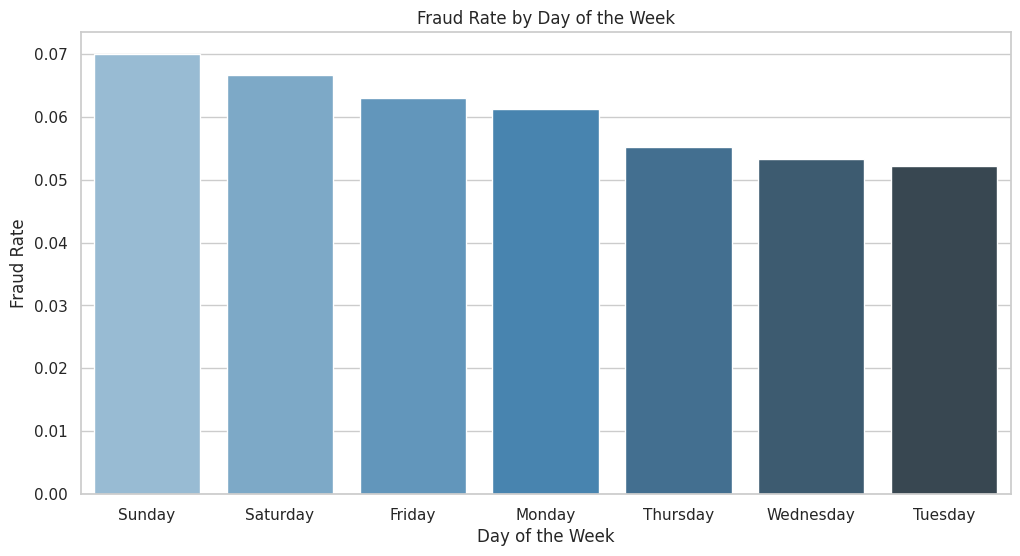

In [17]:
# Plot Fraud Rate by Day of the Week
plt.figure(figsize=(12, 6))
fraud_rate_by_dayofweek = fraud_rates['DayOfWeek']
sns.barplot(x=fraud_rate_by_dayofweek.index, y=fraud_rate_by_dayofweek.values, palette="Blues_d")
plt.title('Fraud Rate by Day of the Week')
plt.ylabel('Fraud Rate')
plt.xlabel('Day of the Week')
plt.show()

Highest fraud rates are on Sundays  followed by Saturday

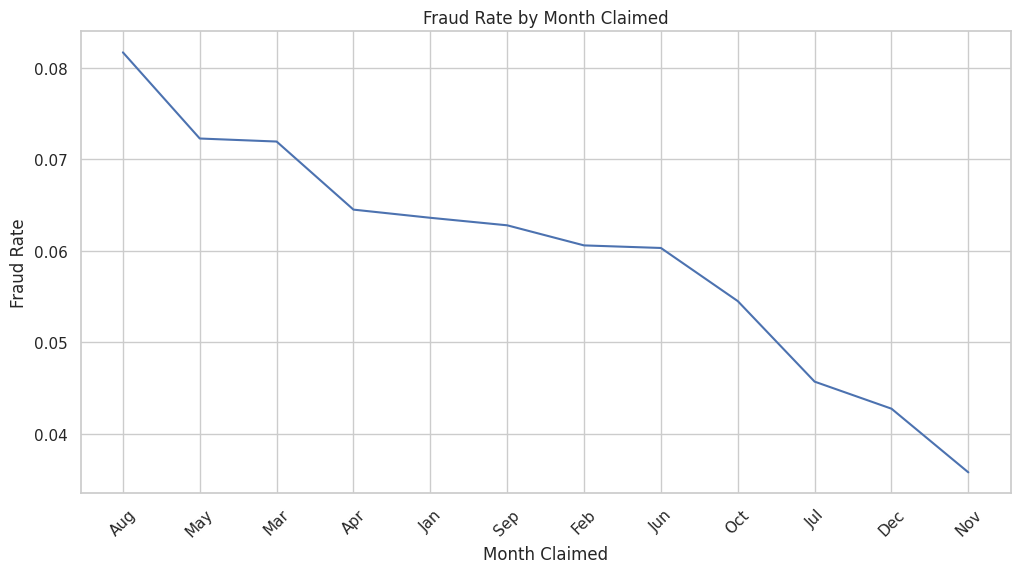

In [18]:
# Line Plot Fraud Rate by Month Claimed
plt.figure(figsize=(12, 6))
fraud_rate_by_month_claimed = fraud_rates['MonthClaimed'].drop('0')
sns.lineplot(x=fraud_rate_by_month_claimed.index, y=fraud_rate_by_month_claimed.values)
plt.title('Fraud Rate by Month Claimed')
plt.ylabel('Fraud Rate')
plt.xlabel('Month Claimed')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Month claimed highest fraud rates are in August  followed by May

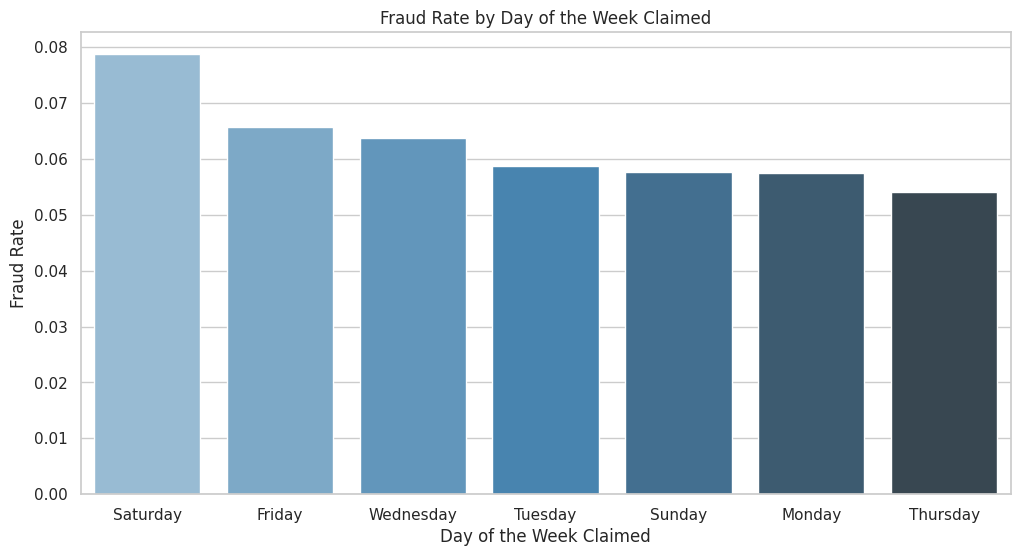

In [46]:
# Plot Fraud Rate by Day of the Week Claimed
plt.figure(figsize=(12, 6))
fraud_rate_by_dayofweek_claimed = fraud_rates['DayOfWeekClaimed'].drop('0')
sns.barplot(x=fraud_rate_by_dayofweek_claimed.index, y=fraud_rate_by_dayofweek_claimed.values, palette="Blues_d")
plt.title('Fraud Rate by Day of the Week Claimed')
plt.ylabel('Fraud Rate')
plt.xlabel('Day of the Week Claimed')
# Add value labels

plt.show()

Day of the week claimed, Highest fraud rate is on Saturday followed by Friday.

## 2. Vehicle Information

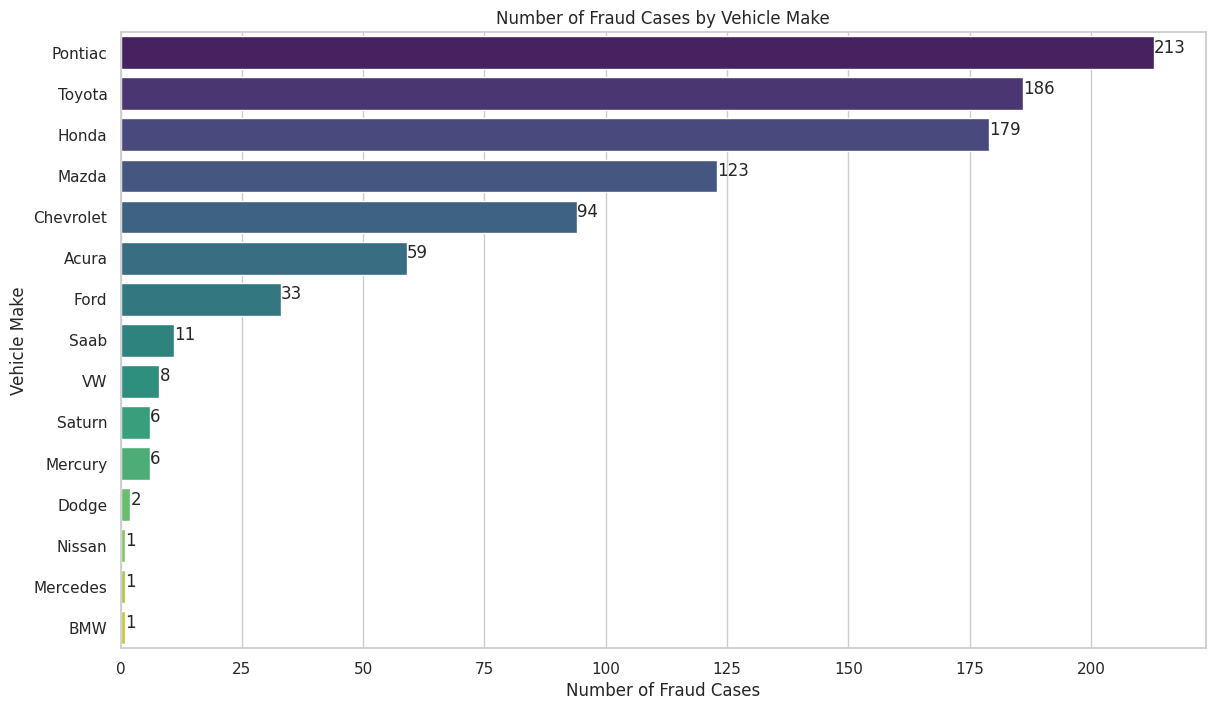

In [49]:
# Set the style for the plots
sns.set(style="whitegrid")

# Function to count fraud cases
def count_fraud_cases(column):
    return Claim_fraud[Claim_fraud['FraudFound_P'] == 1][column].value_counts()

# Horizontal Bar Plot Number of Fraud Cases by Vehicle Make
plt.figure(figsize=(14, 8))
fraud_count_by_make = count_fraud_cases('Make')
sns.barplot(x=fraud_count_by_make.values, y=fraud_count_by_make.index, palette="viridis")
plt.title('Number of Fraud Cases by Vehicle Make')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Vehicle Make')
# Add value labels
for index, value in enumerate(fraud_count_by_make.values):
    plt.text(value, index, str(value))
plt.show()

Pontiac has the highest number of fraud cases followed by Toyota

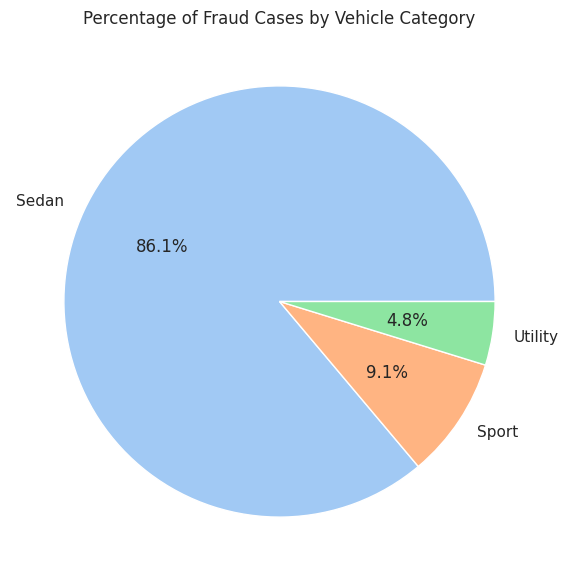

In [21]:
# Pie Chart Number of Fraud Cases by Vehicle Category
plt.figure(figsize=(10, 7))
fraud_count_by_category = count_fraud_cases('VehicleCategory')
plt.pie(fraud_count_by_category.values, labels=fraud_count_by_category.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Percentage of Fraud Cases by Vehicle Category')
plt.show()

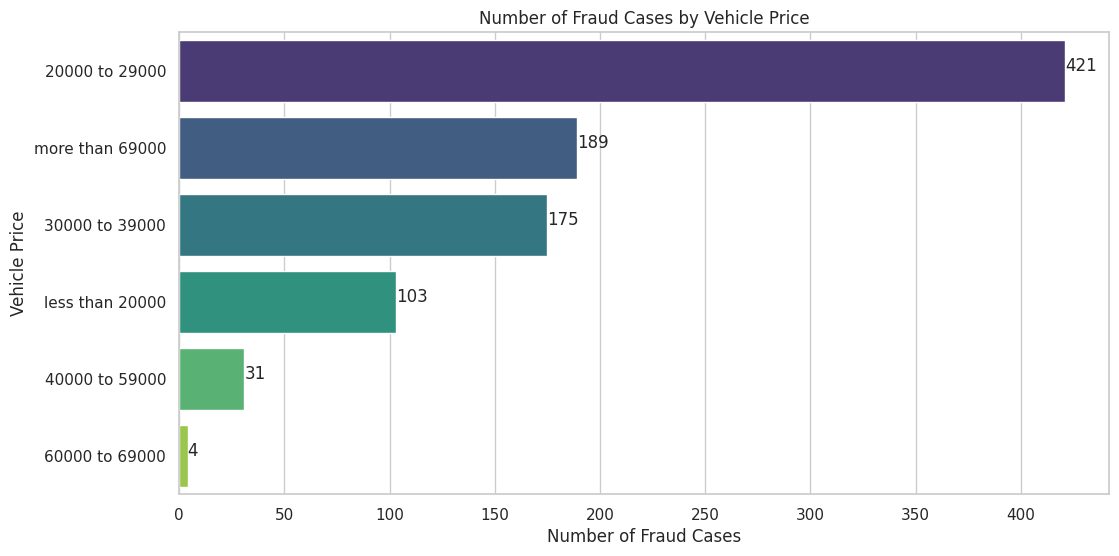

In [50]:
# Horizontal Bar Plot Number of Fraud Cases by Vehicle Price
plt.figure(figsize=(12, 6))
fraud_count_by_price = count_fraud_cases('VehiclePrice')
sns.barplot(x=fraud_count_by_price.values, y=fraud_count_by_price.index, palette="viridis")
plt.title('Number of Fraud Cases by Vehicle Price')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Vehicle Price')
# Add value labels
for index, value in enumerate(fraud_count_by_price.values):
    plt.text(value, index, str(value))
plt.show()

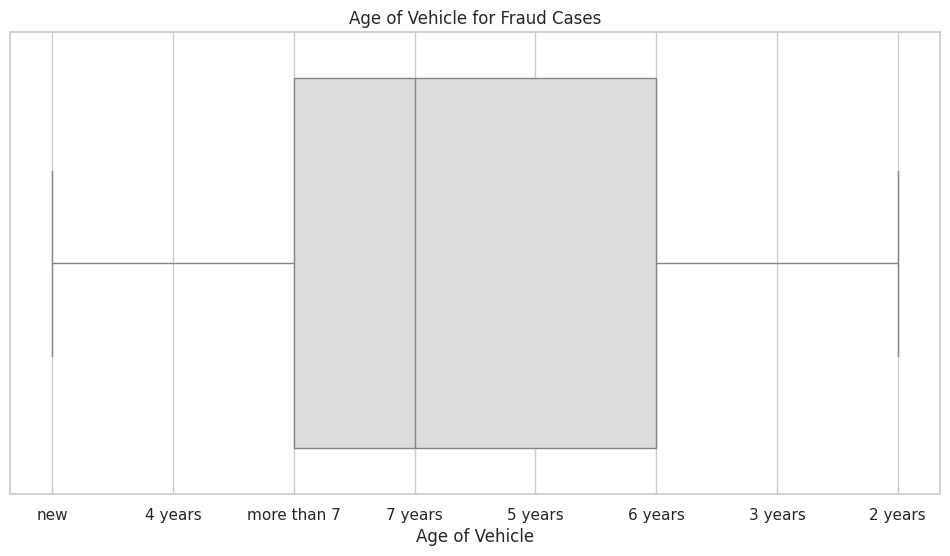

In [23]:
# Box Plot of Age of Vehicle for Fraud Cases
plt.figure(figsize=(12, 6))
fraud_cases_age_of_vehicle = Claim_fraud[Claim_fraud['FraudFound_P'] == 1]['AgeOfVehicle']
sns.boxplot(x=fraud_cases_age_of_vehicle, palette="coolwarm")
plt.title('Age of Vehicle for Fraud Cases')
plt.xlabel('Age of Vehicle')
plt.show()

## 3. Policy Information



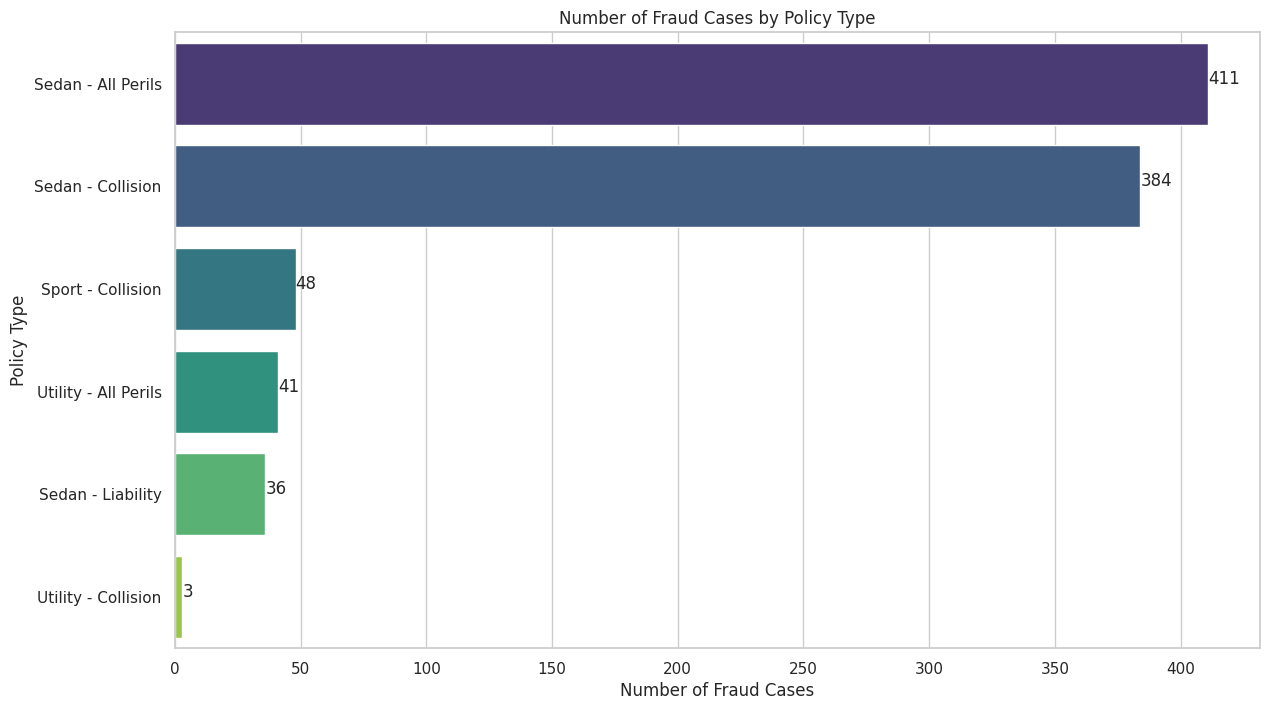

In [51]:
# Horizontal Bar Plot Number of Fraud Cases by Policy Type
plt.figure(figsize=(14, 8))
fraud_count_by_policy_type = count_fraud_cases('PolicyType')
sns.barplot(x=fraud_count_by_policy_type.values, y=fraud_count_by_policy_type.index, palette="viridis")
plt.title('Number of Fraud Cases by Policy Type')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Policy Type')
for index, value in enumerate(fraud_count_by_policy_type.values):
    plt.text(value, index, str(value))
plt.show()

### 4. Personal Information

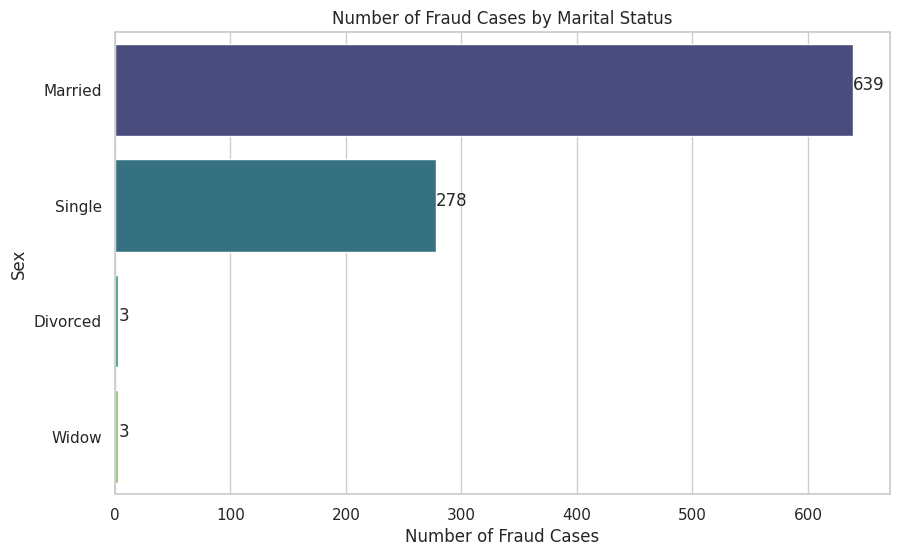

In [53]:

# Set the style for the plots
sns.set(style="whitegrid")

# Function to count fraud cases by sex
def count_fraud_cases_by_sex():
    return Claim_fraud[Claim_fraud['FraudFound_P'] == 1]['MaritalStatus'].value_counts()

# Horizontal Bar Plot Number of Fraud Cases by Sex
plt.figure(figsize=(10, 6))
fraud_count_by_sex = count_fraud_cases_by_sex()
sns.barplot(x=fraud_count_by_sex.values, y=fraud_count_by_sex.index, palette="viridis")
plt.title('Number of Fraud Cases by Marital Status')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Sex')
for index, value in enumerate(fraud_count_by_sex.values):
    plt.text(value, index, str(value))
plt.show()


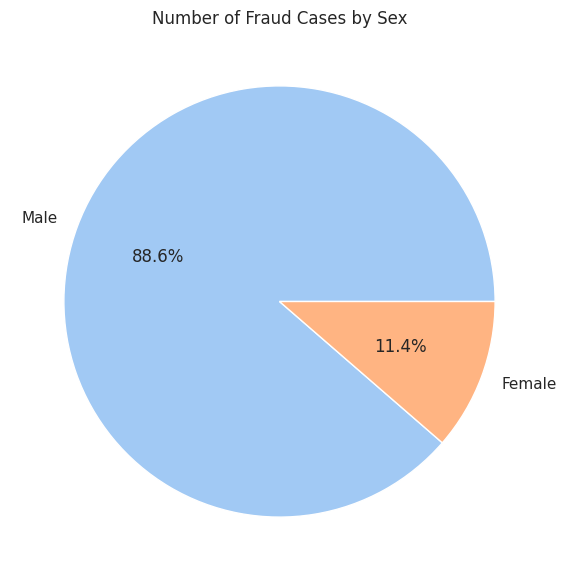

Sex
Male      818
Female    105
Name: count, dtype: int64


In [31]:
# Set the style for the plots
sns.set(style="whitegrid")

# Function to count fraud cases by marital status
def count_fraud_cases_by_marital_status():
    return Claim_fraud[Claim_fraud['FraudFound_P'] == 1]['Sex'].value_counts()

# Pie Chart Number of Fraud Cases by Marital Status
plt.figure(figsize=(10, 7))
fraud_count_by_marital_status = count_fraud_cases_by_marital_status()
plt.pie(fraud_count_by_marital_status.values, labels=fraud_count_by_marital_status.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Number of Fraud Cases by Sex')
plt.show()

# Print the count of fraud cases by marital status
print(fraud_count_by_marital_status)

In [56]:
fraud_count_by_marital_status

Sex
Male      818
Female    105
Name: count, dtype: int64

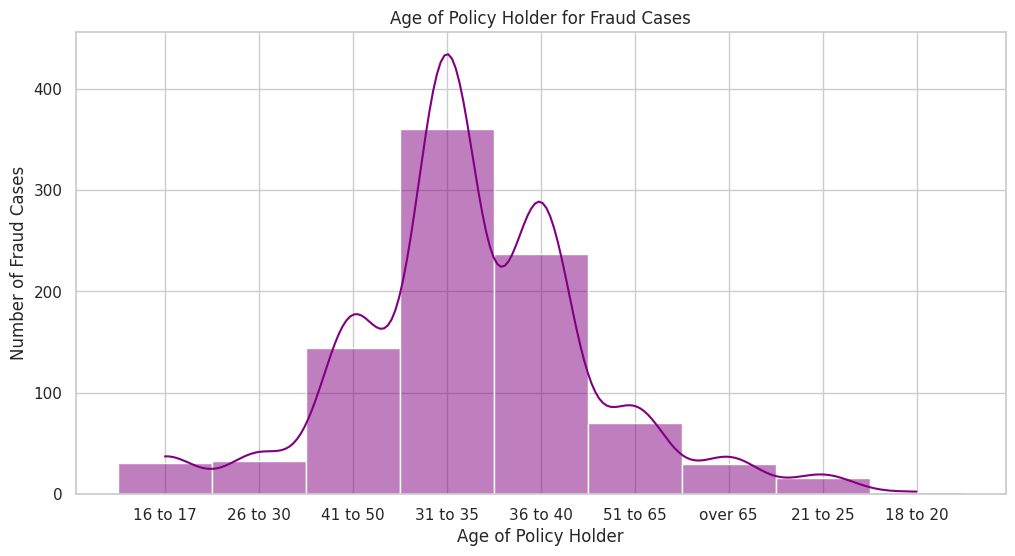

count          923
unique           9
top       31 to 35
freq           360
Name: AgeOfPolicyHolder, dtype: object


In [48]:
# Set the style for the plots
sns.set(style="whitegrid")

# Filter data for fraud cases
fraud_cases_age_of_policy_holder = Claim_fraud[Claim_fraud['FraudFound_P'] == 1]['AgeOfPolicyHolder']

# Histogram of Age of Policy Holder for Fraud Cases
plt.figure(figsize=(12, 6))
sns.histplot(fraud_cases_age_of_policy_holder, kde=True, bins=20, color="purple")
plt.title('Age of Policy Holder for Fraud Cases')
plt.xlabel('Age of Policy Holder')
plt.ylabel('Number of Fraud Cases')
plt.show()

# Print summary statistics for age of policy holder in fraud cases
print(fraud_cases_age_of_policy_holder.describe())

The histogram highlights key age groups where fraud cases are most prevalent.

*   Middle-aged policyholders, particularly those aged 31-35 and 41-50, are more frequently involved in fraud.
*   Younger policyholders, particularly those in the 18-20 and 21-25 age groups, show very low numbers of fraud cases. This suggests that younger individuals are less likely to commit fraud or perhaps have fewer policies.
*   Older policyholders, especially those over 65, also exhibit fewer fraud cases, indicating less involvement in fraudulent activities.
*   The age groups 26-30 and 36-40 have moderate numbers of fraud cases. While they do not peak as high as the 31-35 or 41-50 age groups, they still represent significant portions of the fraud cases.
*    The KDE line provides a smooth estimate of the distribution, reinforcing the observation of peaks around the ages 31-35 and 41-50.
*   The KDE also shows a gradual decrease in fraud cases as age increases beyond 50, supporting the idea that older policyholders are less involved in fraud












### 5. Accident and Claim Details

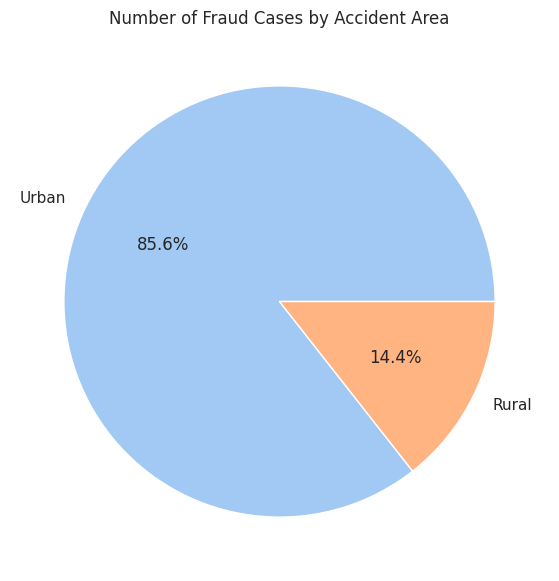

In [35]:
# Set the style for the plots
sns.set(style="whitegrid")

# Function to count fraud cases by column
def count_fraud_cases_by_column(column):
    return Claim_fraud[Claim_fraud['FraudFound_P'] == 1][column].value_counts()

# Pie Chart for Accident Area
plt.figure(figsize=(10, 7))
fraud_count_by_accident_area = count_fraud_cases_by_column('AccidentArea')
plt.pie(fraud_count_by_accident_area.values, labels=fraud_count_by_accident_area.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Number of Fraud Cases by Accident Area')
plt.show()

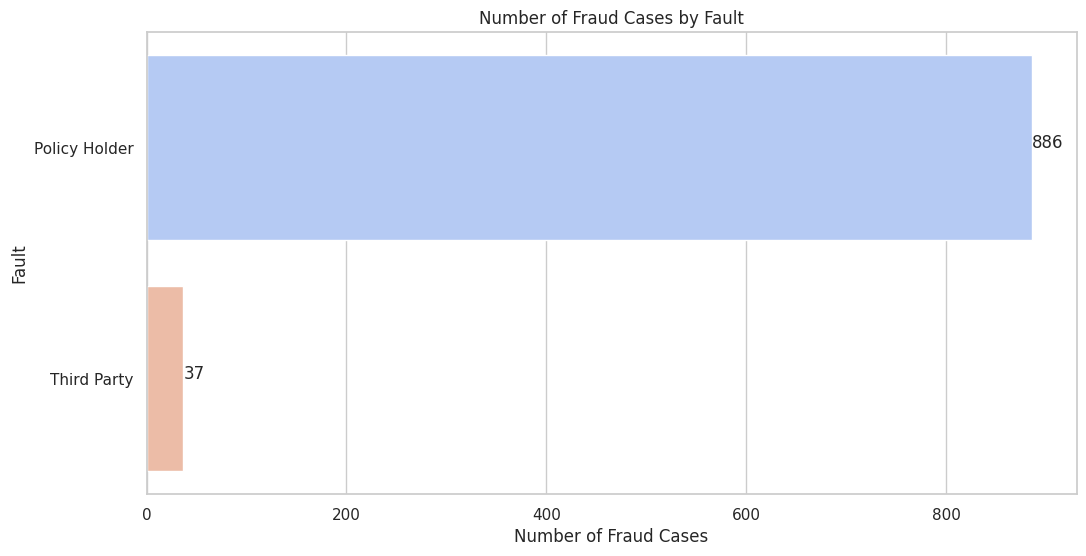

In [43]:
# Horizontal Bar Plot for Fault with Value Labels
plt.figure(figsize=(12, 6))
fraud_count_by_fault = count_fraud_cases_by_column('Fault')
barplot_fault = sns.barplot(x=fraud_count_by_fault.values, y=fraud_count_by_fault.index, palette="coolwarm")
plt.title('Number of Fraud Cases by Fault')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Fault')

# Add value labels
for index, value in enumerate(fraud_count_by_fault.values):
    plt.text(value, index, str(value))

plt.show()

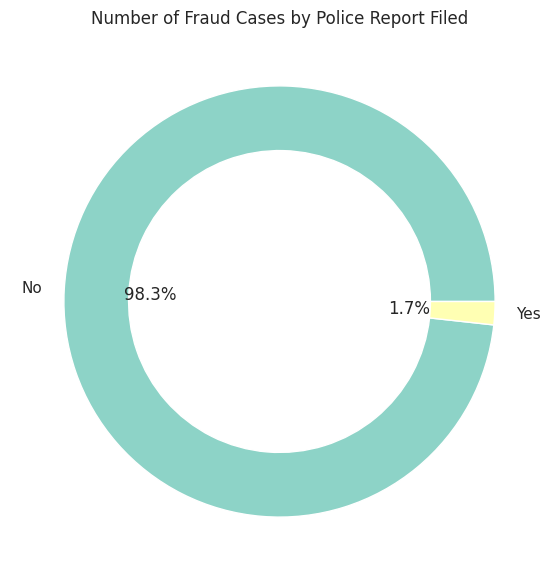

In [37]:
# Donut Chart for Police Report Filed
plt.figure(figsize=(10, 7))
fraud_count_by_police_report = count_fraud_cases_by_column('PoliceReportFiled')
plt.pie(fraud_count_by_police_report.values, labels=fraud_count_by_police_report.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"), wedgeprops=dict(width=0.3))
plt.title('Number of Fraud Cases by Police Report Filed')
plt.show()

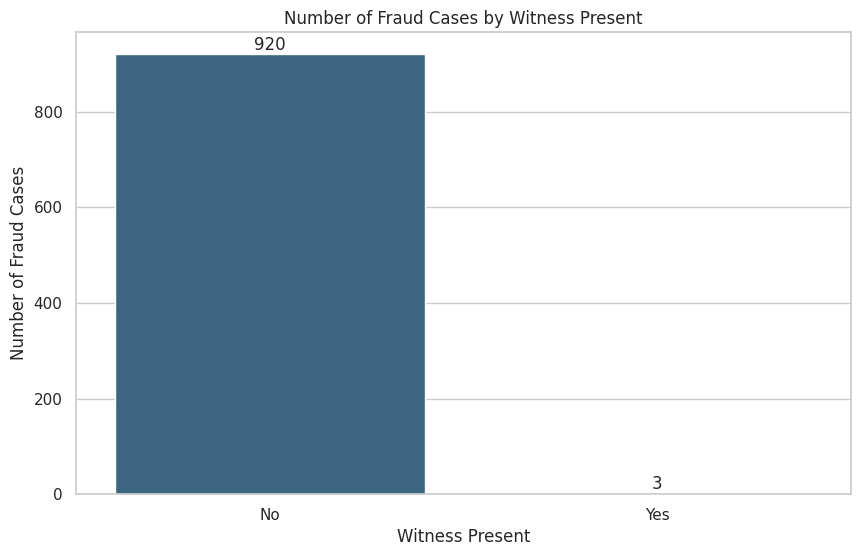

In [44]:
# Bar Plot for Witness Present with Value Labels
plt.figure(figsize=(10, 6))
fraud_count_by_witness_present = count_fraud_cases_by_column('WitnessPresent')
barplot_witness = sns.barplot(x=fraud_count_by_witness_present.index, y=fraud_count_by_witness_present.values, palette="viridis")
plt.title('Number of Fraud Cases by Witness Present')
plt.xlabel('Witness Present')
plt.ylabel('Number of Fraud Cases')

# Add value labels
for index, value in enumerate(fraud_count_by_witness_present.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

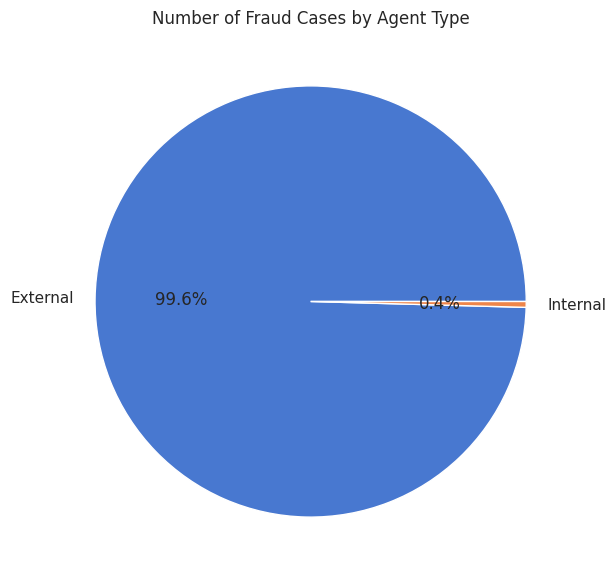

In [39]:
# Pie Chart for Agent Type
plt.figure(figsize=(10, 7))
fraud_count_by_agent_type = count_fraud_cases_by_column('AgentType')
plt.pie(fraud_count_by_agent_type.values, labels=fraud_count_by_agent_type.index, autopct='%1.1f%%', colors=sns.color_palette("muted"))
plt.title('Number of Fraud Cases by Agent Type')
plt.show()

In [ ]:
#